In [1]:
import numpy as np
import matplotlib.pyplot as plt
import visualization
import os
from gta_math import points_to_homo, ndc_to_view, construct_proj_matrix, view_to_world, construct_view_matrix, is_entity_in_image
from visualization import load_depth, load_stencil, save_pointcloud_csv, bbox_from_string, draw3dbboxes, draw_one_entity_3dbbox
import progressbar
from joblib import Parallel, delayed
from configparser import ConfigParser
from PIL import Image
import pickle
import json
from datetime import timedelta, datetime, date
from matplotlib.dates import DateFormatter, DateFormatter, HourLocator

In [2]:
ini_file = "gta-postprocessing.ini"
visualization.multi_page = False
visualization.ini_file = ini_file

conn = visualization.get_connection()
cur = conn.cursor()

CONFIG = ConfigParser()
CONFIG.read(ini_file)
directory = r'D:\generic-dataset'

In [ ]:
# suspicious data, inspect them later
'2018-03-30--09-41-06--808'
'2018-03-30--04-24-44--718'
'2018-03-07--15-22-37--478'
'2018-03-07--16-19-25--084'
'2018-03-07--17-32-15--567'
'2018-03-07--16-18-02--972
'

In [36]:
#base_name = '2018-03-30--04-35-59--854'
base_name = '2018-03-30--09-41-06--808'

rgb_file = os.path.join(directory, '{}.jpg'.format(base_name))
#depth_file = os.path.join(directory, '{}-depth.png'.format(base_name))
depth_file = os.path.join(directory, '{}.png'.format(base_name))
json_file = os.path.join(directory, '{}.json'.format(base_name))
rgb = np.array(Image.open(rgb_file))
depth = np.array(Image.open(depth_file))
depth = depth / np.iinfo(np.uint16).max  # normalizing into NDC
with open(json_file, mode='r') as f:
    data = json.load(f)


In [37]:
entities = data['entities']
view_matrix = np.array(data['view_matrix'])
proj_matrix = np.array(data['proj_matrix'])
if 'width' in data:
    width = data['width']
else:
    width = 1914
    data['width'] = width
if 'height' in data:
    height = data['height']
else:
    height = 1052
    data['height'] = height
    
visible_cars = [e for e in entities if
                e['type'] == 'car' and e['class'] != 'Trains' and is_entity_in_image(depth, e, view_matrix,
                                                                                     proj_matrix, width, height)]
#visible_cars[4]

In [38]:
visible_cars

[{'bbox': [[inf, inf], [-inf, -inf]],
  'class': 'Sedans',
  'handle': 291330,
  'model_sizes': [-0.915331721305847,
   0.915331602096558,
   -2.30877280235291,
   2.14984154701233,
   -0.573544025421143,
   0.989072620868683],
  'pos': [449.889099121094, -1331.07873535156, 42.316162109375],
  'rot': [-0.347637295722961, 7.21449184417725, 137.227401733398],
  'type': 'car'},
 {'bbox': [[inf, inf], [-inf, -inf]],
  'class': 'SUVs',
  'handle': 316930,
  'model_sizes': [-1.02483987808228,
   1.02058017253876,
   -2.23891663551331,
   2.27759790420532,
   -0.520126461982727,
   1.305424451828],
  'pos': [374.136260986328, -1575.77758789062, 28.6674003601074],
  'rot': [-0.186378866434097, 3.29206085205078, -132.486053466797],
  'type': 'car'},
 {'bbox': [[inf, inf], [-inf, -inf]],
  'class': 'Muscle',
  'handle': 582658,
  'model_sizes': [-0.990596532821655,
   0.990596413612366,
   -3.13233947753906,
   2.46378040313721,
   -0.486325979232788,
   0.849163115024567],
  'pos': [352.8378601

camera pos:  [328.404968261719, -1331.78930664062, 32.549488067627]
2D bbox: [[  22.62528823  431.56220777]
 [   0.          405.87239522]]
2D bbox: [[ 1915.00052274   502.48561301]
 [ 1908.42576644   491.6112949 ]]
2D bbox: [[ 125.81373973  605.03979353]
 [   0.          521.43021301]]


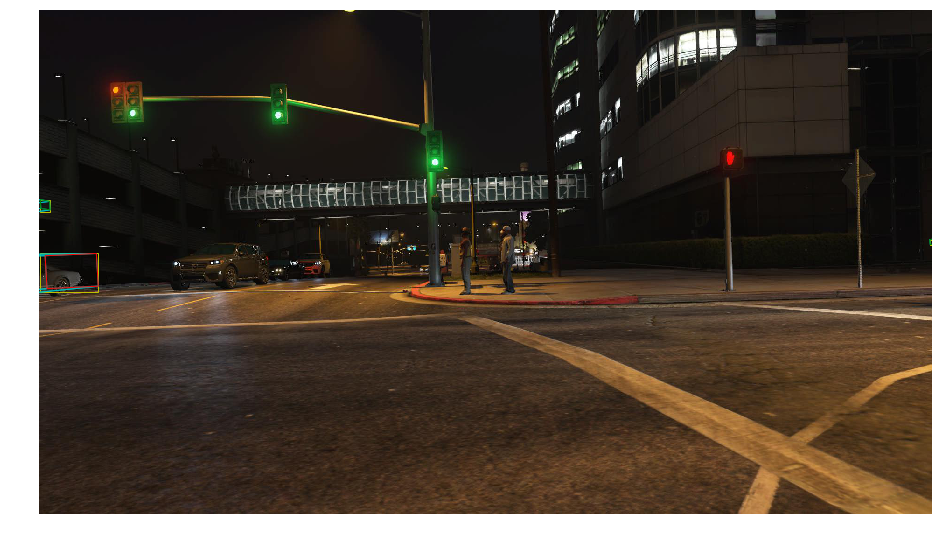

In [39]:
fig = plt.figure(figsize=(16, 12))
draw3dbboxes(rgb, depth, data, fig)
#plt.imshow(rgb)
#draw_one_entity_3dbbox(visible_cars[4], view_matrix, proj_matrix, width, height, fig.gca())
plt.show()

In [40]:
[e for e in entities if e['type'] == 'car']

[{'bbox': [[inf, inf], [-inf, -inf]],
  'class': 'Vans',
  'handle': 627970,
  'model_sizes': [-1.1361221075058,
   1.1361221075058,
   -2.59343433380127,
   2.36421251296997,
   -0.515991985797882,
   1.80167245864868],
  'pos': [69.9858245849609, -1501.80432128906, -71.1553573608398],
  'rot': [0.0, -0.0, 0.0],
  'type': 'car'},
 {'bbox': [[inf, inf], [-inf, -inf]],
  'class': 'Muscle',
  'handle': 633602,
  'model_sizes': [-0.990596532821655,
   0.990596413612366,
   -3.13233947753906,
   2.46378040313721,
   -0.486325979232788,
   0.849163115024567],
  'pos': [194.708862304688, -1361.06591796875, 28.7488193511963],
  'rot': [0.159130543470383, 1.72414588928223, -22.5869369506836],
  'type': 'car'},
 {'bbox': [[0.925996005535126, 0.49203485250473],
   [0.897402763366699, 0.472354620695114]],
  'class': 'Vans',
  'handle': 313090,
  'model_sizes': [-1.1361221075058,
   1.1361221075058,
   -2.59343433380127,
   2.36421251296997,
   -0.515991985797882,
   1.80167245864868],
  'pos': [3

In [12]:
rgb_file = os.path.join(directory, '2018-03-30--05-22-21--832.jpg')
depth_file = os.path.join(directory, '2018-03-30--05-22-21--832-depth.png')
json_file = os.path.join(directory, '2018-03-30--05-22-21--832.json')
rgb = np.array(Image.open(rgb_file))
depth = np.array(Image.open(depth_file))
depth = depth / np.iinfo(np.uint16).max  # normalizing into NDC
with open(json_file, mode='r') as f:
    data = json.load(f)


camera pos:  [2477.35888671875, 5103.86328125, 46.0536575317383]
2D bbox: [[ 1116.54716131   601.47909939]
 [  705.23786472   215.50972247]]


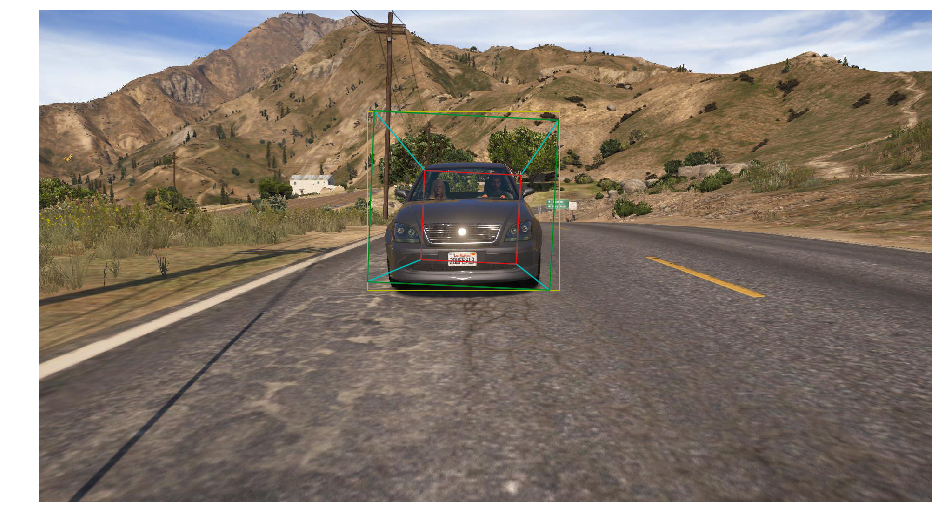

In [13]:
fig = plt.figure(figsize=(16, 12))
draw3dbboxes(rgb, depth, data, fig)
plt.show()